# CREAR LAS TABLAS USUARIO, ROL, Y USUARIO_ROL E INSERTAR DATOS

In [ ]:
import sqlite3
from datetime import datetime, timedelta
import random
import string

# Listas de nombres y apellidos comunes
nombres_hombres = [
    'Juan', 'Carlos', 'Luis', 'Jorge', 'Francisco', 'Miguel', 'Antonio', 'Jose', 'David', 'Alejandro', 'John', 'Andree',
    'Lucas', 'Jesus', 'Alberto', 'Cesar', 'Julio', 'Arnold', 'Leonardo', 'Rodrigo', 'Yasser', 'Matias', 'Jhon', 'Gustavo',
    'Arturo', 'Franco', 'Sebastian', 'Diego', 'Guillermo', 'Joe', 'Erick', 'Yitzak', 'Gary', 'Joseph', 'Deyvis', 'Jefferson',
    'Andres', 'Eduardo', 'Emilio', 'Fred', 'Pedro', 'Joe', 'Daniel', 'Pablo', 'Ivan', 'Ruben', 'Osvaldo', 'Martin', 'Brayan',
    'Brandom', 'Jair', 'Giomar', 'Cristopher', 'Sandro', 'Ronaldo', 'Eiriku', 'Moises', 'Mauricio', 'Armando', 'Angelo', 'Nicolas',
    'Javier', 'Manuel', 'Fernando', 'Ricardo', 'Rafael', 'Santiago', 'Mario', 'Adrian', 'Enrique', 'Victor', 'Ignacio', 'Raul',
    'Michael', 'Gonzalo', 'Simon', 'Julian', 'Cristian', 'Tomas', 'Emiliano', 'Esteban', 'Mateo', 'Fabian', 'Patricio', 'Edwin',
    'Claudio', 'Gabriel', 'Noel', 'Mariano', 'Sergio', 'Ernesto', 'Franklin', 'Henry', 'Isaias', 'Jean', 'Cristhian', 'Alexis',
    'Lenin', 'Roy', 'Alonso', 'Alfonso', 'Lorenzo', 'Fredy', 'Oscar', 'Marcelo', 'Marlex', 'Williams', 'Fabricio', 'Bill', 'Billie',
    'Ronald', 'Alfredo', 'Bryan', 'Hugo', 'Deivis', 'Adriano', 'Tito', 'Elmer', 'Marco', 'Yanfranco', 'Richard', 'Joaquin', 'Alessandro',
    'Wilder', 'Willie', 'Franchesco', 'Aldo', 'Andre', 'Paul', 'Cristofer', 'Jeffer', 'Erickson', 'Elisban', 'Kenyi', 'Emanuel', 'Renato',
    'Agustin', 'Ramon', 'Patrick', 'Eder', 'Rony', 'Roni', 'Steven', 'James', 'Felipe', 'Albert', 'Fabio', 'Ulises', 'Vladimir', 'Antony',
    'Alvaro', 'Hernando', 'Omar', 'Jonathan', 'Yonatan', 'Jeyson', 'Cristhiam', 'Jacob', 'Harold', 'Harol', 'Giancarlo', 'Paolo', 'Enzo',
    'Jhonny', 'Frederick', 'Gerardo', 'Benjamin', 'Aaron', 'Angel', 'Robert', 'Roberto', 'Cristobal', 'Wilmer', 'Joel', 'Gilberto', 'Andy',
    'Both', 'Logan', 'Tony', 'Nick', 'Dylan', 'Igor', 'Karim', 'Junior', 'Alan', 'Dario', 'Gael', 'Leo', 'Ander', 'Felix', 'Nestor', 'Jack',
    'Jacobo', 'Abraham', 'Domingo', 'Kenior'
]
nombres_mujeres = [
    'Maria', 'Ana', 'Elena', 'Lucia', 'Carmen', 'Sofia', 'Laura', 'Isabel', 'Patricia', 'Andrea', 'Roxana',
    'Kristell', 'Katherine', 'Sandra', 'Carla', 'Kiara', 'Carolina', 'Rosa', 'Milagros', 'Sahori', 'Natalia',
    'Mariane', 'Paola', 'Micaela', 'Susana', 'Xiomara', 'Valeria', 'Yannella', 'Nicole', 'Shirley', 'Emma',
    'Julieta', 'Leticia', 'Alicia', 'Mirella', 'Aurora', 'Marcia', 'Flor', 'Ada', 'Paula', 'Daniela', 'Nancy',
    'Alexandra', 'Lidia', 'Waldy', 'Gladys', 'Nayeli', 'Yolanda', 'Sara', 'Raquel', 'Eva', 'Irene', 'Victoria',
    'Teresa', 'Marta', 'Fernanda', 'Mia', 'Silvia', 'Estefany', 'Leydi', 'Nicol', 'Yadhira', 'Ingrid', 'Gloria',
    'Michelle', 'Lia', 'Diana', 'Dayana', 'Carlota', 'Martina', 'Jimena', 'Miriam', 'Elizabeth', 'Veronica', 'Karen',
    'Alessandra', 'Mariela', 'Lisbeth', 'Karina', 'Dina', 'Aracely', 'Adriana', 'Ariana', 'Ivonne', 'Geraldine',
    'Angelina', 'Shantal', 'Angelly', 'Rosmery', 'Cristina', 'Thalia', 'Melany', 'Beatriz', 'Amelia', 'Jerika',
    'Rossana', 'Camila', 'Lizeth', 'Tatiana', 'Esther', 'Sheyla', 'Antonella', 'Angelica', 'Elvira', 'Maribel', 'Nikol',
    'Claudia', 'Kelly', 'Pilar', 'Pamela', 'Luisa', 'Tracy', 'Rosalinda', 'Jessica', 'Vanesa', 'Vanessa', 'Gianella', 'Brigitte',
    'Mercedes', 'Valeska', 'Abigail', 'Monica', 'Rossmery', 'Angela', 'Hermione', 'Yessenia', 'Gabriela', 'Luz', 'Luna', 'Giannina',
    'Magaly', 'Stephanie', 'Zoraida', 'Maricruz', 'Irina', 'Nicoll', 'Karla', 'Giovanna', 'Darinka', 'Almendra', 'Zuleika', 'Fiorella',
    'Joseline', 'Jahaira', 'Yahaira', 'Martha', 'Stefany', 'MariaJose', 'Jazmin', 'Jasmin', 'Medaly', 'Dafne', 'Yohana', 'Helen',
    'Mariana', 'Araceli', 'Annie', 'Fabiola', 'Franchezca', 'Franchesca', 'Yuliana', 'Soledad', 'Milenne', 'Samantha', 'Sam', 'Melani',
    'Rossangela', 'Rous', 'Yaretzi', 'Sarahi', 'Ashly', 'Mayra', 'Viviana', 'Sunesis', 'Alessia', 'Yuli', 'Julia', 'Jennifer'
]
apellidos_comunes = [
    'Garcia', 'Martinez', 'Lopez', 'Sanchez', 'Perez', 'Gonzalez', 'Rodriguez', 'Fernandez', 'Martin', 'Gomez',
    'Soria', 'LLantoy', 'Viru', 'Camones', 'Caycho', 'Rivas', 'Cuba', 'Palomino', 'Aliaga', 'Silva', 'Alba',
    'Farje', 'Asin', 'Ramos', 'Araujo', 'Vera', 'Avalos', 'Montero', 'Diaz', 'Arevalo', 'Flores', 'Huamani',
    'Granados', 'Soto', 'Limay', 'Vilchez', 'Marino', 'Calixto', 'Nieves', 'Tompson', 'Carrillo', 'Yamao', 'Brena',
    'Carbajal', 'Estrada', 'Guizado', 'Farfan', 'Acuna', 'Arboleda', 'Gonzales', 'Benites', 'Huertas', 'Avelino'
    'Linares', 'Cherres', 'Escalante', 'Villalobos', 'Ortega', 'Sullca', 'Duarte', 'Jacome', 'Galindo', 'Guerra',
    'Torres', 'Ramirez', 'Huaman', 'Vasquez', 'Castillo', 'Espinoza', 'Laurente', 'Mamani', 'Rojas', 'Salvatierra',
    'Sangama', 'Caceres', 'Rivero', 'Basurco', 'Casma', 'Ortiz', 'Rivera', 'Nicodemos', 'Salazar', 'Poma', 'Serna',
    'Romero', 'Hernandez', 'Mautino', 'Ochoa', 'Montenegro', 'Llerena', 'Palacios', 'Quichiz', 'Salas', 'Cardenas',
    'Lucero', 'Cordova', 'Andia', 'Vilcayauri', 'Arias', 'Nivardo', 'Cano', 'Velarde', 'Vega', 'Apolinario', 'Aguilar',
    'Abad', 'Valle', 'Abanto', 'Quiroz', 'Abrigo', 'Acha', 'Acosta', 'Luna', 'Aguero', 'Rengifo', 'Echeandia', 'Montalvo',
    'Nino', 'Aguirre', 'Pereira', 'Santiago', 'Ticona', 'Davila', 'Aiquipa', 'Yllanes', 'Alarcon', 'Huarcaya', 'Llanque',
    'Loayza', 'Masco', 'Molina', 'Pastrana', 'Quispe', 'Reyes', 'Tamayo', 'Figueroa', 'Alcas', 'Alaya', 'Coaguila', 'Alegria',
    'Acevedo', 'Alejos', 'Mancilla', 'Alfaro', 'Alva', 'Alvarado', 'Leon', 'Alvarez', 'Montoya', 'Melendez', 'Alvino', 'Vengoa',
    'Amado', 'Leguia', 'Amancay', 'Ninalaya', 'Amaya', 'Morante', 'Ambrosio', 'Alegre', 'Corrales', 'Amodeo', 'Ancco', 'Campomanes',
    'Inca', 'Anco', 'Bayona', 'Ancori', 'Bruna', 'Condori', 'Andrade', 'Apaza', 'Carpio', 'Huamantinco', 'Aquino', 'Julcarima', 'Arapa',
    'Paredes', 'Arce', 'Arbulu', 'Culqui', 'Arenas', 'Calderon', 'Carrion', 'Armas', 'Verastegui', 'Arpasi', 'Arratia', 'Arrazola', 'Campos',
    'Montalvan', 'Maldini', 'Arroyo', 'Lagos', 'Chavez', 'Asin', 'Asencios', 'Tello', 'Villanueva', 'Robles', 'Vilca', 'Ugarte', 'Avila',
    'Auccapuma', 'Ayala', 'Palma', 'Aymara', 'Modesto', 'Caballero', 'Ayrampo', 'Mayta', 'Baca', 'Azabache', 'Magallan', 'Cahuana', 'Balbin',
    'Balcazar', 'Baldoceda', 'Pinedo', 'Tapia', 'Ballena', 'Bances', 'Correa', 'Churampi', 'Mendoza', 'Barrantes', 'Barrera', 'Barriga', 'Barrios',
    'Chuchon', 'Ticlla', 'Basilio', 'Bautista', 'Prada', 'Bazan', 'Gomero', 'Becerra', 'Bejarano', 'Galvez', 'Bustamante', 'Bellido', 'Benavente',
    'Benavides', 'Guzman', 'Bernal', 'Valderrama', 'Velasquez', 'Bernardo', 'Ruiz', 'Atayupanqui', 'Berrocal', 'Gamarra', 'Alcedo', 'Bertolotti',
    'Berroa', 'Bilbao', 'Borcari', 'Borda', 'Rebolledo', 'Bravo', 'Carmona', 'Bordon', 'Lezcano', 'Granados', 'Velez', 'Briceno', 'Santander',
    'Bruno', 'Ibanez', 'Carrascal', 'Delgado', 'Vargas', 'Butron', 'Buitron', 'Cabana', 'Altamirano', 'Cabrera', 'Yparraguirre', 'Lazo', 'Roldan',
    'Carrasco', 'Villarreal', 'Castro', 'Lara', 'Camacho', 'Duran', 'Ipanaque', 'Valdelomar', 'Lovera', 'Picasso', 'Dominguez', 'Tarazona', 'Gusman',
    'Ossorio', 'Solis', 'Cervantes', 'Montalvo', 'Saavedra', 'Yataco', 'Guevara', 'Leyva', 'Mora', 'Casallo', 'Melgar', 'Valverde', 'Peralta', 'Olivos'
]

# Funciones para generar datos
#def generar_nombre():
 #   #nombres = random.choices(nombres_hombres + nombres_mujeres, k=2)  # Se eligen dos nombres al azar
  #  #random.shuffle(nombres)  # Se mezclan aleatoriamente los nombres
   # #return ' '.join(nombres)  # Se combinan los nombres en uno solo
    #nombres = random.choices([nombres_hombres, nombres_mujeres], weights=[0.5, 0.5])
    #return ' '.join(random.sample(nombres[0], random.randint(1, 2)))

# Funciones para generar datos
def generar_nombre_y_genero():
    if random.random() < 0.5:
        nombres = random.sample(nombres_hombres, random.randint(1, 2))
        genero = 'MASCULINO'
    else:
        nombres = random.sample(nombres_mujeres, random.randint(1, 2))
        genero = 'FEMENINO'
    return ' '.join(nombres), genero

def generar_apellido():
    #return random.choice(apellidos_comunes)
    apellidos = random.sample(apellidos_comunes, 2)  # Se eligen dos apellidos al azar
    return ' '.join(apellidos)  # Se combinan los apellidos en uno solo


def generar_dni():
    return ''.join(random.choices('0123456789', k=8))

def generar_email(nombre, apellido):
    dominios = ['example.com', 'email.com', 'test.com','gmail.com', 'hotmail.com', 'usmp.pe']
    return f"{nombre.lower().replace(' ', '')}.{apellido.lower().replace(' ', '')}@{random.choice(dominios)}"

def generar_password():
    caracteres = string.ascii_letters + string.digits
    return ''.join(random.choices(caracteres, k=10))

def generar_fecha(base_date, days_offset):
    return (base_date + timedelta(days=days_offset)).strftime('%Y-%m-%d')

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')
cursor = conn.cursor()

# Crear las tablas
cursor.execute('''
CREATE TABLE IF NOT EXISTS USUARIO (
    ID_USUARIO INTEGER PRIMARY KEY,
    NOMBRES TEXT NOT NULL,
    APELLIDOS TEXT NOT NULL,
    DNI TEXT NOT NULL UNIQUE,
    EMAIL TEXT NOT NULL,
    GENERO TEXT NOT NULL,
    PASSWORD TEXT NOT NULL,
    FECHA_REG DATE NOT NULL,
    FECHA_ACT DATE
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS ROL (
    ID_ROL INTEGER PRIMARY KEY,
    NOMBRE TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS USUARIO_ROL (
    USUARIO_ID INTEGER,
    ROL_ID INTEGER,
    PRIMARY KEY (USUARIO_ID, ROL_ID),
    FOREIGN KEY (USUARIO_ID) REFERENCES USUARIO(ID_USUARIO),
    FOREIGN KEY (ROL_ID) REFERENCES ROL(ID_ROL)
)
''')
conn.commit()

# Limpiar las tablas antes de insertar nuevos datos
cursor.execute('DELETE FROM USUARIO_ROL')
cursor.execute('DELETE FROM USUARIO')
cursor.execute('DELETE FROM ROL')
conn.commit()

# Generar y insertar datos en las tablas USUARIO y ROL
base_date = datetime.strptime('2023-01-01', '%Y-%m-%d')

# Insertar roles
roles = ['Admin', 'Cliente', 'Empleado']
for i, rol in enumerate(roles, start=1):
    cursor.execute('''
    INSERT INTO ROL (ID_ROL, NOMBRE) VALUES (?, ?)
    ''', (i, rol))

# Insertar usuarios
usuarios = []
dni_set = set()
for i in range(1, 1001): # hasta 1000 datos
    nombre, genero = generar_nombre_y_genero()
    apellido = generar_apellido()

    dni = generar_dni()
    while dni in dni_set:
        dni = generar_dni()
    dni_set.add(dni)

    email = generar_email(nombre, apellido)
    password = generar_password()
    fecha_reg = generar_fecha(base_date, random.randint(0, 365))
    fecha_act = generar_fecha(base_date, random.randint(366, 730)) if random.choice([True, False]) else None

    usuarios.append((i, nombre, apellido, dni, email, genero, password, fecha_reg, fecha_act))
    cursor.execute('''
    INSERT INTO USUARIO (ID_USUARIO, NOMBRES, APELLIDOS, DNI, EMAIL, GENERO, PASSWORD, FECHA_REG, FECHA_ACT)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (i, nombre, apellido, dni, email, genero, password, fecha_reg, fecha_act))

# Insertar datos en la tabla USUARIO_ROL
for usuario in usuarios:
    rol_id = random.randint(1, len(roles))
    cursor.execute('''
    INSERT INTO USUARIO_ROL (USUARIO_ID, ROL_ID) VALUES (?, ?)
    ''', (usuario[0], rol_id))

# Guardar los cambios en la base de datos
conn.commit()

# Ver datos insertados en la tabla USUARIO
print("\nDatos en la tabla USUARIO:")
cursor.execute('SELECT * FROM USUARIO')
filas_usuario = cursor.fetchall()
for fila in filas_usuario:
    print(fila)

# Ver datos insertados en la tabla ROL
print("\nDatos en la tabla ROL:")
cursor.execute('SELECT * FROM ROL')
filas_rol = cursor.fetchall()
for fila in filas_rol:
    print(fila)

# Ver datos insertados en la tabla USUARIO_ROL
print("\nDatos en la tabla USUARIO_ROL:")
cursor.execute('SELECT * FROM USUARIO_ROL')
filas_usuario_rol = cursor.fetchall()
for fila in filas_usuario_rol:
    print(fila)

# Cerrar la conexión a la base de datos
conn.close()


Datos en la tabla USUARIO:
(1, 'Jeyson', 'Alegre Cano', '10964806', 'jeyson.alegrecano@usmp.pe', 'MASCULINO', 'niQQ0Yq1aQ', '2023-01-27', '2024-09-21')
(2, 'Elisban', 'Granados Arbulu', '64133542', 'elisban.granadosarbulu@gmail.com', 'MASCULINO', 'KBJHYYsxxv', '2023-08-01', '2024-03-08')
(3, 'Roni Abraham', 'Ortega Amancay', '91643850', 'roniabraham.ortegaamancay@gmail.com', 'MASCULINO', 'NGRJrWZWof', '2023-11-02', '2024-05-17')
(4, 'Antonio Cristian', 'Lara Diaz', '90251413', 'antoniocristian.laradiaz@example.com', 'MASCULINO', 'bOFhr76XfV', '2023-02-25', '2024-06-05')
(5, 'Ada Vanesa', 'Gonzalez Granados', '73181026', 'adavanesa.gonzalezgranados@test.com', 'FEMENINO', 'CJMqudSftZ', '2023-02-04', '2024-03-02')
(6, 'Fiorella', 'Gomez Loayza', '64365515', 'fiorella.gomezloayza@example.com', 'FEMENINO', 'CrTUGb1TPQ', '2023-06-11', None)
(7, 'Carlos', 'Acha Benavides', '88000520', 'carlos.achabenavides@email.com', 'MASCULINO', 'knXAYw4Pgd', '2023-08-21', '2024-02-16')
(8, 'Giovanna', 'Ar

# EXPORTAR LA DATA DE LAS TABLAS USUARIO, ROL Y USUARIO_ROL CREADAS ANTERIORMENTE

In [ ]:
import sqlite3
import csv
from datetime import datetime

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')
cursor = conn.cursor()

# Exportar datos de la tabla USUARIO
cursor.execute('SELECT * FROM USUARIO')
with open('usuarios.csv', 'w', newline='', encoding='utf-8') as archivo_csv:
    writer = csv.writer(archivo_csv)
    writer.writerow([i[0] for i in cursor.description])  # Escribir encabezados
    for row in cursor.fetchall():
        # Convertir la fecha al formato deseado
        row = list(row)
        row[7] = datetime.strptime(str(row[7]), '%Y-%m-%d').strftime('%Y-%m-%d') # AÑO - MES - DIA
        # Convertir los datos a cadenas Unicode y escribir en el archivo CSV
        writer.writerow([str(cell) for cell in row])

# Exportar datos de la tabla ROL
cursor.execute('SELECT * FROM ROL')
with open('roles.csv', 'w', newline='') as archivo_csv:
    writer = csv.writer(archivo_csv)
    writer.writerow([i[0] for i in cursor.description])  # Escribir encabezados
    writer.writerows(cursor.fetchall())

# Exportar datos de la tabla USUARIO_ROL
cursor.execute('SELECT * FROM USUARIO_ROL')
with open('usuario_rol.csv', 'w', newline='') as archivo_csv:
    writer = csv.writer(archivo_csv)
    writer.writerow([i[0] for i in cursor.description])  # Escribir encabezados
    writer.writerows(cursor.fetchall())

# Cerrar la conexión a la base de datos
conn.close()

# CREAR LAS DEMAS TABLAS DE CATEGORIA, PRODUCTO, PROFORMA, PAGO, PEDIDO, DETALLE_PEDIDO E INSERTAR DATOS - NO EJECUTAR

In [ ]:
import sqlite3
import random
from datetime import datetime, timedelta

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')
cursor = conn.cursor()

# Crear las tablas
cursor.execute('''
CREATE TABLE IF NOT EXISTS CATEGORIA (
    ID_CATEGORIA INTEGER PRIMARY KEY,
    NOMBRE TEXT NOT NULL,
    DESCRIPCION TEXT NOT NULL,
    FECHA_REG DATE NOT NULL,
    FECHA_ACT DATE
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS PRODUCTO (
    ID_PRODUCTO INTEGER PRIMARY KEY,
    CATEGORIA_ID INTEGER NOT NULL,  -- Cambio de INTEGER a NUMBER
    NOMBRE TEXT NOT NULL,
    DESCRIPCION TEXT NOT NULL,
    IMAGEN TEXT NOT NULL,
    PRECIO REAL NOT NULL,
    STOCK INTEGER NOT NULL,
    FECHA_REG DATE NOT NULL,
    FECHA_ACT DATE,
    FOREIGN KEY (CATEGORIA_ID) REFERENCES CATEGORIA(ID_CATEGORIA)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS PROFORMA (
    ID_PROFORMA INTEGER PRIMARY KEY,
    USUARIO_ID INTEGER NOT NULL,
    PRODUCTO_ID INTEGER NOT NULL,
    CANTIDAD INTEGER NOT NULL,
    PRECIO REAL NOT NULL,
    STATUS TEXT NOT NULL,
    FECHA_REG DATE NOT NULL,
    FOREIGN KEY (USUARIO_ID) REFERENCES USUARIO(ID_USUARIO),
    FOREIGN KEY (PRODUCTO_ID) REFERENCES PRODUCTO(ID_PRODUCTO)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS PAGO (
    ID_PAGO INTEGER PRIMARY KEY,
    USUARIO_ID INTEGER NOT NULL,
    NOMBRE_TARJETA TEXT NOT NULL,
    NUMERO_TARJETA TEXT NOT NULL,
    MONTO_TOTAL REAL NOT NULL,
    FECHA_PAGO DATE NOT NULL,
    FOREIGN KEY (USUARIO_ID) REFERENCES USUARIO(ID_USUARIO)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS PEDIDO (
    ID_PEDIDO INTEGER PRIMARY KEY,
    USUARIO_ID INTEGER NOT NULL,
    PAGO_ID INTEGER NOT NULL,
    STATUS TEXT NOT NULL,
    FOREIGN KEY (USUARIO_ID) REFERENCES USUARIO(ID_USUARIO),
    FOREIGN KEY (PAGO_ID) REFERENCES PAGO(ID_PAGO)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS DETALLE_PEDIDO (
    ID_DETALLE_PEDIDO INTEGER PRIMARY KEY,
    PEDIDO_ID INTEGER NOT NULL,
    PRODUCTO_ID INTEGER NOT NULL,
    CANTIDAD INTEGER NOT NULL,
    PRECIO REAL NOT NULL,
    FOREIGN KEY (PEDIDO_ID) REFERENCES PEDIDO(ID_PEDIDO),
    FOREIGN KEY (PRODUCTO_ID) REFERENCES PRODUCTO(ID_PRODUCTO)
)
''')

# Limpiar las tablas antes de insertar nuevos datos
cursor.execute('DELETE FROM CATEGORIA')
cursor.execute('DELETE FROM PRODUCTO')
cursor.execute('DELETE FROM PROFORMA')
cursor.execute('DELETE FROM PAGO')
cursor.execute('DELETE FROM PEDIDO')
cursor.execute('DELETE FROM DETALLE_PEDIDO')
conn.commit()

# Funciones para generar datos aleatorios
def generar_fecha(base_date, days_offset):
    return (base_date + timedelta(days=days_offset)).strftime('%Y-%m-%d')

# Insertar datos en la tabla CATEGORIA
categorias = [
    (1, 'Pollo a la Brasa', 'Pollo asado a la parrilla', '2023-01-01', '2023-01-02'),
    (2, 'Acompañamientos', 'Papas fritas, yucas, ensaladas', '2023-01-01', '2023-01-02'),
    (3, 'Bebidas', 'Gaseosas, jugos naturales', '2023-01-01', '2023-01-02'),
    (4, 'Postres', 'Tortas, helados, postres varios', '2023-01-01', '2023-01-02'),
    (5, 'Entradas', 'Empanadas, anticuchos, tequeños', '2023-01-01', '2023-01-02'),
    (6, 'Platos Especiales', 'Platos especiales de la casa', '2023-01-01', '2023-01-02'),
    (7, 'Ensaladas', 'Ensaladas frescas y saludables', '2023-01-01', '2023-01-02'),
    (8, 'Sopas', 'Sopas caseras y reconfortantes', '2023-01-01', '2023-01-02'),
    (9, 'Parrillas', 'Variedad de carnes a la parrilla', '2023-01-01', '2023-01-02'),
    (10, 'Mariscos', 'Platos de mariscos frescos', '2023-01-01', '2023-01-02')
]
cursor.executemany('''
INSERT INTO CATEGORIA (ID_CATEGORIA, NOMBRE, DESCRIPCION, FECHA_REG, FECHA_ACT)
VALUES (?, ?, ?, ?, ?)
''', categorias)

# Insertar datos en la tabla PRODUCTO
productos = [
    (1, 1, 'Pollo Entero', 'Pollo a la brasa entero', 'imagen_pollo.jpg', 26.0, 50, '2023-01-01', '2023-01-02'),
    (2, 1, '1/4 de Pollo', '1/4 de pollo a la brasa', 'imagen_pollo_quarter.jpg', 9.0, 100, '2023-01-01', '2023-01-02'),
    (3, 2, 'Papas Fritas', 'Papas fritas crujientes', 'imagen_papas.jpg', 4.0, 200, '2023-01-01', '2023-01-02'),
    (4, 2, 'Yucas Fritas', 'Yucas fritas y doradas', 'imagen_yucas.jpg', 5.0, 150, '2023-01-01', '2023-01-02'),
    (5, 3, 'Gaseosa', 'Gaseosa de cola', 'imagen_gaseosa.jpg', 2.0, 300, '2023-01-01', '2023-01-02'),
    (6, 3, 'Jugo de Naranja', 'Jugo de naranja natural', 'imagen_jugo.jpg', 3.0, 100, '2023-01-01', '2023-01-02'),
    (7, 4, 'Torta de Chocolate', 'Deliciosa torta de chocolate', 'imagen_torta.jpg', 16.0, 50, '2023-01-01', '2023-01-02'),
    (8, 4, 'Helado de Vainilla', 'Helado cremoso de vainilla', 'imagen_helado.jpg', 6.0, 100, '2023-01-01', '2023-01-02'),
    (9, 5, 'Empanadas de Carne', 'Empanadas rellenas de carne', 'imagen_empanadas.jpg', 3.0, 200, '2023-01-01', '2023-01-02'),
    (10, 5, 'Anticuchos de Pollo', 'Anticuchos de pollo marinados', 'imagen_anticuchos.jpg', 4.0, 150, '2023-01-01', '2023-01-02'),
    (11, 6, 'Parrillada Especial', 'Combinación de carnes a la parrilla', 'imagen_parrillada.jpg', 30.0, 50, '2023-01-01', '2023-01-02'),
    (12, 7, 'Ensalada César', 'Ensalada fresca con aderezo especial', 'imagen_ensalada.jpg', 9.0, 80, '2023-01-01', '2023-01-02'),
    (13, 8, 'Sopa de Pollo', 'Sopa de pollo casera', 'imagen_sopa.jpg', 7.0, 60, '2023-01-01', '2023-01-02'),
    (14, 9, 'Parrillada Mixta', 'Variedad de carnes y chorizos a la parrilla', 'imagen_parrillada_mixta.jpg', 36.0, 40, '2023-01-01', '2023-01-02'),
    (15, 10, 'Ceviche Mixto', 'Ceviche de pescado y mariscos frescos', 'imagen_ceviche.jpg', 41.0, 40, '2023-01-01', '2023-01-02') ]
cursor.executemany('''
INSERT INTO PRODUCTO (ID_PRODUCTO, CATEGORIA_ID, NOMBRE, DESCRIPCION, IMAGEN, PRECIO, STOCK, FECHA_REG, FECHA_ACT)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
''', productos)

# Insertar datos en la tabla PROFORMA (simular pedidos)
fecha_base = datetime.strptime('2023-01-01', '%Y-%m-%d')
for i in range(1, 51): # 50 DATOS EN LA TABLA PROFORMA
    usuario_id = random.randint(1, 100)  # Supongamos que hay 100 usuarios en la base de datos
    producto_id = random.randint(1, 15)  # Hay 15 productos en la tabla PRODUCTO
    cantidad = random.randint(1, 5)
    precio = random.uniform(1.99, 35.99)  # Precio aleatorio entre 1.99 y 35.99
    status = random.choice(['Pendiente', 'Enviado', 'Entregado'])
    fecha_reg = generar_fecha(fecha_base, random.randint(0, 365))

    cursor.execute('''
    INSERT INTO PROFORMA (USUARIO_ID, PRODUCTO_ID, CANTIDAD, PRECIO, STATUS, FECHA_REG)
    VALUES (?, ?, ?, ?, ?, ?)
    ''', (usuario_id, producto_id, cantidad, precio, status, fecha_reg))

# Insertar datos en la tabla PAGO
for i in range(1, 51): # 50 PAGOS
    usuario_id = random.randint(1, 100)  # Supongamos que hay 100 usuarios en la base de datos
    nombre_tarjeta = 'Tarjeta de crédito' + str(i)
    numero_tarjeta = '**** **** **** ' + ''.join(random.choices('0123456789', k=4))
    monto_total = random.uniform(10, 1000)  # Monto total aleatorio entre 10 y 1000
    fecha_pago = generar_fecha(fecha_base, random.randint(0, 365))

    cursor.execute('''
    INSERT INTO PAGO (USUARIO_ID, NOMBRE_TARJETA, NUMERO_TARJETA, MONTO_TOTAL, FECHA_PAGO)
    VALUES (?, ?, ?, ?, ?)
    ''', (usuario_id, nombre_tarjeta, numero_tarjeta, monto_total, fecha_pago))

# Insertar datos en la tabla PEDIDO
for i in range(1, 51): # 50 PEDIDOS
    usuario_id = random.randint(1, 100)  # Supongamos que hay 100 usuarios en la base de datos
    pago_id = i  # Se asume que el id de pago coincide con el número de pedido
    status = random.choice(['Pendiente', 'Enviado', 'Entregado'])

    cursor.execute('''
    INSERT INTO PEDIDO (USUARIO_ID, PAGO_ID, STATUS)
    VALUES (?, ?, ?)
    ''', (usuario_id, pago_id, status))

# Insertar datos en la tabla DETALLE_PEDIDO
for i in range(1, 51): # 50 DETALLES DE PEDIDOS
    pedido_id = i
    producto_id = random.randint(1, 15)  # Hay 15 productos en la tabla PRODUCTO
    cantidad = random.randint(1, 5)
    precio = random.uniform(1.99, 35.99)  # Precio aleatorio entre 1.99 y 35.99

    cursor.execute('''
    INSERT INTO DETALLE_PEDIDO (PEDIDO_ID, PRODUCTO_ID, CANTIDAD, PRECIO)
    VALUES (?, ?, ?, ?)
    ''', (pedido_id, producto_id, cantidad, precio))

# Guardar los cambios y cerrar la conexión
conn.commit()


# Mostrar datos de la tabla CATEGORIA
print("\nDatos en la tabla CATEGORIA:")
cursor.execute('SELECT * FROM CATEGORIA')
filas_categoria = cursor.fetchall()
for fila in filas_categoria:
    print(fila)

# Mostrar datos de la tabla PRODUCTO
print("\nDatos en la tabla PRODUCTO:")
cursor.execute('SELECT * FROM PRODUCTO')
filas_producto = cursor.fetchall()
for fila in filas_producto:
    print(fila)

# Mostrar datos de la tabla PROFORMA
print("\nDatos en la tabla PROFORMA:")
cursor.execute('SELECT * FROM PROFORMA')
filas_proforma = cursor.fetchall()
for fila in filas_proforma:
    print(fila)

# Mostrar datos de la tabla PAGO
print("\nDatos en la tabla PAGO:")
cursor.execute('SELECT * FROM PAGO')
filas_pago = cursor.fetchall()
for fila in filas_pago:
    print(fila)

# Mostrar datos de la tabla PEDIDO
print("\nDatos en la tabla PEDIDO:")
cursor.execute('SELECT * FROM PEDIDO')
filas_pedido = cursor.fetchall()
for fila in filas_pedido:
    print(fila)

# Mostrar datos de la tabla DETALLE_PEDIDO
print("\nDatos en la tabla DETALLE_PEDIDO:")
cursor.execute('SELECT * FROM DETALLE_PEDIDO')
filas_detalle_pedido = cursor.fetchall()
for fila in filas_detalle_pedido:
    print(fila)



# CREAR LAS DEMAS TABLAS DE CATEGORIA, PRODUCTO, PROFORMA, PAGO, PEDIDO, DETALLE_PEDIDO E INSERTAR DATOS V2

In [ ]:
import sqlite3
import random
from datetime import datetime, timedelta

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')
cursor = conn.cursor()

# Crear las tablas (se asume que ya existen y solo se verifica su existencia)
cursor.execute('''
CREATE TABLE IF NOT EXISTS CATEGORIA (
    ID_CATEGORIA INTEGER PRIMARY KEY,
    NOMBRE TEXT NOT NULL,
    DESCRIPCION TEXT NOT NULL,
    FECHA_REG DATE NOT NULL,
    FECHA_ACT DATE
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS PRODUCTO (
    ID_PRODUCTO INTEGER PRIMARY KEY,
    CATEGORIA_ID INTEGER NOT NULL,
    NOMBRE TEXT NOT NULL,
    DESCRIPCION TEXT NOT NULL,
    IMAGEN TEXT NOT NULL,
    PRECIO INTEGER NOT NULL,
    STOCK INTEGER NOT NULL,
    FECHA_REG DATE NOT NULL,
    FECHA_ACT DATE,
    FOREIGN KEY (CATEGORIA_ID) REFERENCES CATEGORIA(ID_CATEGORIA)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS PROFORMA (
    ID_PROFORMA INTEGER PRIMARY KEY,
    USUARIO_ID INTEGER NOT NULL,
    PRODUCTO_ID INTEGER NOT NULL,
    CANTIDAD INTEGER NOT NULL,
    PRECIO INTEGER NOT NULL,
    STATUS TEXT NOT NULL,
    FECHA_REG DATE NOT NULL,
    FOREIGN KEY (USUARIO_ID) REFERENCES USUARIO(ID_USUARIO),
    FOREIGN KEY (PRODUCTO_ID) REFERENCES PRODUCTO(ID_PRODUCTO)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS PAGO (
    ID_PAGO INTEGER PRIMARY KEY,
    USUARIO_ID INTEGER NOT NULL,
    NOMBRE_TARJETA TEXT NOT NULL,
    NUMERO_TARJETA TEXT NOT NULL,
    MONTO_TOTAL INTEGER NOT NULL,
    FECHA_PAGO DATE NOT NULL,
    FOREIGN KEY (USUARIO_ID) REFERENCES USUARIO(ID_USUARIO)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS PEDIDO (
    ID_PEDIDO INTEGER PRIMARY KEY,
    USUARIO_ID INTEGER NOT NULL,
    PAGO_ID INTEGER NOT NULL,
    STATUS TEXT NOT NULL,
    FOREIGN KEY (USUARIO_ID) REFERENCES USUARIO(ID_USUARIO),
    FOREIGN KEY (PAGO_ID) REFERENCES PAGO(ID_PAGO)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS DETALLE_PEDIDO (
    ID_DETALLE_PEDIDO INTEGER PRIMARY KEY,
    PEDIDO_ID INTEGER NOT NULL,
    PRODUCTO_ID INTEGER NOT NULL,
    CANTIDAD INTEGER NOT NULL,
    PRECIO INTEGER NOT NULL,
    FOREIGN KEY (PEDIDO_ID) REFERENCES PEDIDO(ID_PEDIDO),
    FOREIGN KEY (PRODUCTO_ID) REFERENCES PRODUCTO(ID_PRODUCTO)
)
''')

# Limpiar las tablas antes de insertar nuevos datos
cursor.execute('DELETE FROM CATEGORIA')
cursor.execute('DELETE FROM PRODUCTO')
cursor.execute('DELETE FROM PROFORMA')
cursor.execute('DELETE FROM PAGO')
cursor.execute('DELETE FROM PEDIDO')
cursor.execute('DELETE FROM DETALLE_PEDIDO')
conn.commit()

# Funciones para generar datos aleatorios
def generar_fecha(base_date, days_offset):
    return (base_date + timedelta(days=days_offset)).strftime('%Y-%m-%d')

# Obtener información del usuario con un ID específico
#def obtener_nombre_apellido_usuario(usuario_id):
 #   cursor.execute('SELECT NOMBRES, APELLIDOS FROM USUARIO WHERE ID_USUARIO = ?', (usuario_id,))
  #  nombre_apellido = cursor.fetchone()
   # if nombre_apellido:
   #     return nombre_apellido
   # else:
   #     return None

# Obtener información del usuario con un ID específico
def obtener_nombre_apellido_usuario(usuario_id):
    cursor.execute('SELECT NOMBRES, APELLIDOS FROM USUARIO WHERE ID_USUARIO = ?', (usuario_id,))
    nombre_apellido = cursor.fetchone()
    if nombre_apellido:
        nombre, apellido = nombre_apellido
        nombre = nombre.upper()
        apellido = apellido.upper()
        nombre_apellido_mayusculas = f"{nombre} {apellido}"
        return nombre_apellido_mayusculas
    else:
        return None

def generar_numero_tarjeta():
    return '-'.join([''.join([str(random.randint(0, 9)) for _ in range(4)]) for _ in range(4)])


# Insertar datos en la tabla CATEGORIA
categorias = [
    (1, 'Pollo a la Brasa', 'Pollo asado a la parrilla', '2023-01-01', '2023-01-02'),
    (2, 'Acompañamientos', 'Papas fritas, yucas, ensaladas', '2023-01-01', '2023-01-02'),
    (3, 'Bebidas', 'Gaseosas, jugos naturales', '2023-01-01', '2023-01-02'),
    (4, 'Postres', 'Tortas, helados, postres varios', '2023-01-01', '2023-01-02'),
    (5, 'Entradas', 'Empanadas, anticuchos, tequeños', '2023-01-01', '2023-01-02'),
    (6, 'Platos Especiales', 'Platos especiales de la casa', '2023-01-01', '2023-01-02'),
    (7, 'Ensaladas', 'Ensaladas frescas y saludables', '2023-01-01', '2023-01-02'),
    (8, 'Sopas', 'Sopas caseras y reconfortantes', '2023-01-01', '2023-01-02'),
    (9, 'Parrillas', 'Variedad de carnes a la parrilla', '2023-01-01', '2023-01-02'),
    (10, 'Mariscos', 'Platos de mariscos frescos', '2023-01-01', '2023-01-02')
]
cursor.executemany('''
INSERT INTO CATEGORIA (ID_CATEGORIA, NOMBRE, DESCRIPCION, FECHA_REG, FECHA_ACT)
VALUES (?, ?, ?, ?, ?)
''', categorias)

# Insertar datos en la tabla PRODUCTO
productos = [
    (1, 1, 'Pollo Entero', 'Pollo a la brasa entero', 'imagen_pollo.jpg', 26, 500, '2023-01-01', '2023-01-02'),
    (2, 1, '1/4 de Pollo', '1/4 de pollo a la brasa', 'imagen_pollo_quarter.jpg', 9, 1000, '2023-01-01', '2023-01-02'),
    (3, 2, 'Papas Fritas', 'Papas fritas crujientes', 'imagen_papas.jpg', 4, 2000, '2023-01-01', '2023-01-02'),
    (4, 2, 'Yucas Fritas', 'Yucas fritas y doradas', 'imagen_yucas.jpg', 5, 1500, '2023-01-01', '2023-01-02'),
    (5, 3, 'Gaseosa', 'Gaseosa de cola', 'imagen_gaseosa.jpg', 2, 3000, '2023-01-01', '2023-01-02'),
    (6, 3, 'Jugo de Naranja', 'Jugo de naranja natural', 'imagen_jugo.jpg', 3, 1000, '2023-01-01', '2023-01-02'),
    (7, 4, 'Torta de Chocolate', 'Deliciosa torta de chocolate', 'imagen_torta.jpg', 16, 500, '2023-01-01', '2023-01-02'),
    (8, 4, 'Helado de Vainilla', 'Helado cremoso de vainilla', 'imagen_helado.jpg', 6, 1000, '2023-01-01', '2023-01-02'),
    (9, 5, 'Empanadas de Carne', 'Empanadas rellenas de carne', 'imagen_empanadas.jpg', 3, 2000, '2023-01-01', '2023-01-02'),
    (10, 5, 'Anticuchos de Pollo', 'Anticuchos de pollo marinados', 'imagen_anticuchos.jpg', 4, 1500, '2023-01-01', '2023-01-02'),
    (11, 6, 'Parrillada Especial', 'Combinación de carnes a la parrilla', 'imagen_parrillada.jpg', 30, 500, '2023-01-01', '2023-01-02'),
    (12, 7, 'Ensalada César', 'Ensalada fresca con aderezo especial', 'imagen_ensalada.jpg', 9, 800, '2023-01-01', '2023-01-02'),
    (13, 8, 'Sopa de Pollo', 'Sopa de pollo casera', 'imagen_sopa.jpg', 7, 600, '2023-01-01', '2023-01-02'),
    (14, 9, 'Parrillada Mixta', 'Variedad de carnes y chorizos a la parrilla', 'imagen_parrillada_mixta.jpg', 36, 400, '2023-01-01', '2023-01-02'),
    (15, 10, 'Ceviche Mixto', 'Ceviche de pescado y mariscos frescos', 'imagen_ceviche.jpg', 41, 400, '2023-01-01', '2023-01-02')
]
cursor.executemany('''
INSERT INTO PRODUCTO (ID_PRODUCTO, CATEGORIA_ID, NOMBRE, DESCRIPCION, IMAGEN, PRECIO, STOCK, FECHA_REG, FECHA_ACT)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
''', productos)

# Insertar datos en la tabla PROFORMA
status_options = ['Pendiente', 'Pagado']
fecha_base = datetime(2023, 1, 1)
#proformas = [
 #   (i + 1, random.randint(1, 10), random.randint(1, 15), random.randint(1, 5), random.uniform(2.0, 50.0), random.choice(status_options), generar_fecha(fecha_base, i)) for i in range(100)
#]
proformas = []
for i in range(100):
    usuario_id = random.randint(1, 100)
    producto_id = random.randint(1, 15)
    cantidad = random.randint(1, 10)
    # Obtener el precio del producto
    cursor.execute('SELECT PRECIO FROM PRODUCTO WHERE ID_PRODUCTO = ?', (producto_id,))
    precio_producto = cursor.fetchone()[0]
    precio_total = precio_producto
    status = random.choice(status_options)
    fecha_reg = generar_fecha(fecha_base, i)
    proformas.append((i + 1, usuario_id, producto_id, cantidad, precio_total, status, fecha_reg))

cursor.executemany('''
INSERT INTO PROFORMA (ID_PROFORMA, USUARIO_ID, PRODUCTO_ID, CANTIDAD, PRECIO, STATUS, FECHA_REG)
VALUES (?, ?, ?, ?, ?, ?, ?)
''', proformas)


# Insertar datos en las tablas PAGO, PEDIDO, DETALLE_PEDIDO
pagos = []
pedidos = []
detalle_pedidos = []

# Generar registros de pago y pedido para al menos 50 proformas con estado 'Pagado'
proformas_pagadas = cursor.execute('SELECT ID_PROFORMA, USUARIO_ID, PRODUCTO_ID, CANTIDAD, PRECIO FROM PROFORMA WHERE STATUS = "Pagado"').fetchall()
proformas_pagadas = proformas_pagadas[:50]  # Asegurarse de tener al menos 50 proformas pagadas

for proforma in proformas_pagadas:
    id_proforma, usuario_id, producto_id, cantidad, precio = proforma
    id_pago = len(pagos) + 1
    fecha_pago = generar_fecha(fecha_base, random.randint(0, 30))
    monto_total = cantidad * precio  # Convertir el monto total a entero


    # Obtener nombre y apellido del usuario
    nombre_apellido = obtener_nombre_apellido_usuario(usuario_id)
    if nombre_apellido:
        nombre_tarjeta = ' '.join(nombre_apellido)
    else:
        nombre_tarjeta = 'Nombre Desconocido'

    numero_tarjeta = generar_numero_tarjeta()

    # Obtener el precio actual del producto desde la tabla PRODUCTO
    cursor.execute('SELECT PRECIO FROM PRODUCTO WHERE ID_PRODUCTO = ?', (producto_id,))
    precio_producto = cursor.fetchone()[0]


    pagos.append((id_pago, usuario_id, nombre_apellido, numero_tarjeta, monto_total, fecha_pago))

    id_pedido = len(pedidos) + 1
    status_ped = random.choice(['En Proceso', 'Enviado', 'Entregado'])
    pedidos.append((id_pedido, usuario_id, id_pago, status_ped))

    detalle_pedidos.append((len(detalle_pedidos) + 1, id_pedido, producto_id, cantidad, precio_producto))

cursor.executemany('''
INSERT INTO PAGO (ID_PAGO, USUARIO_ID, NOMBRE_TARJETA, NUMERO_TARJETA, MONTO_TOTAL, FECHA_PAGO)
VALUES (?, ?, ?, ?, ?, ?)
''', pagos)

cursor.executemany('''
INSERT INTO PEDIDO (ID_PEDIDO, USUARIO_ID, PAGO_ID, STATUS)
VALUES (?, ?, ?, ?)
''', pedidos)

cursor.executemany('''
INSERT INTO DETALLE_PEDIDO (ID_DETALLE_PEDIDO, PEDIDO_ID, PRODUCTO_ID, CANTIDAD, PRECIO)
VALUES (?, ?, ?, ?, ?)
''', detalle_pedidos)

# Confirmar los cambios y cerrar la conexión
conn.commit()
conn.close()

print("Datos insertados correctamente.")

Datos insertados correctamente.


# COMPROBANDO DATA INSERTADA SI COINCIDE EL PAGO, PEDIDO, PROFORMA Y DETALLE PEDIDO

In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')
cursor = conn.cursor()

# Definir el ID de pago que deseas consultar
pago_id = 1  # Cambia este valor al ID de pago que desees verificar

# Definir el query
query = f'''
SELECT
    PAGO.ID_PAGO,
    PAGO.USUARIO_ID AS USUARIO_PAGO,
    PAGO.NOMBRE_TARJETA,
    PAGO.NUMERO_TARJETA,
    PAGO.MONTO_TOTAL,
    PAGO.FECHA_PAGO,
    PEDIDO.ID_PEDIDO,
    PEDIDO.USUARIO_ID AS USUARIO_PEDIDO,
    PEDIDO.STATUS AS STATUS_PEDIDO,
    DETALLE_PEDIDO.ID_DETALLE_PEDIDO,
    DETALLE_PEDIDO.PRODUCTO_ID,
    DETALLE_PEDIDO.CANTIDAD,
    DETALLE_PEDIDO.PRECIO AS PRECIO_DETALLE,
    PROFORMA.ID_PROFORMA,
    PROFORMA.USUARIO_ID AS USUARIO_PROFORMA,
    PROFORMA.PRODUCTO_ID AS PRODUCTO_PROFORMA,
    PROFORMA.CANTIDAD AS CANTIDAD_PROFORMA,
    PROFORMA.PRECIO AS PRECIO_PROFORMA,
    PROFORMA.STATUS AS STATUS_PROFORMA,
    PROFORMA.FECHA_REG AS FECHA_PROFORMA
FROM
    PAGO
    JOIN PEDIDO ON PAGO.ID_PAGO = PEDIDO.PAGO_ID
    JOIN DETALLE_PEDIDO ON PEDIDO.ID_PEDIDO = DETALLE_PEDIDO.PEDIDO_ID
    JOIN PROFORMA ON DETALLE_PEDIDO.PRODUCTO_ID = PROFORMA.PRODUCTO_ID AND PROFORMA.USUARIO_ID = PEDIDO.USUARIO_ID
WHERE
    PAGO.ID_PAGO = {pago_id};
'''

# Ejecutar el query y obtener los resultados en un DataFrame
df = pd.read_sql_query(query, conn)

# Mostrar el DataFrame con los resultados
print(df)

# Cerrar la conexión
conn.close()

   ID_PAGO  USUARIO_PAGO           NOMBRE_TARJETA       NUMERO_TARJETA  \
0        1            81  JOE PALACIOS MONTENEGRO  5190-5179-8376-0473   

   MONTO_TOTAL  FECHA_PAGO  ID_PEDIDO  USUARIO_PEDIDO STATUS_PEDIDO  \
0            9  2023-01-05          1              81       Enviado   

   ID_DETALLE_PEDIDO  PRODUCTO_ID  CANTIDAD  PRECIO_DETALLE  ID_PROFORMA  \
0                  1            9         3               3            1   

   USUARIO_PROFORMA  PRODUCTO_PROFORMA  CANTIDAD_PROFORMA  PRECIO_PROFORMA  \
0                81                  9                  3                3   

  STATUS_PROFORMA FECHA_PROFORMA  
0          Pagado     2023-01-01  


# EXPORTAR LA DATA DE PEDIDO, DETALLE_PEDIDO, PAGO, PROFORMA, PRODUCTO, CATEGORIA

In [ ]:
import sqlite3
import csv

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')
cursor = conn.cursor()

# Exportar datos de la tabla CATEGORIA a un archivo CSV
cursor.execute('SELECT * FROM CATEGORIA')
with open('categoria.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow([i[0] for i in cursor.description])  # Escribir encabezados
    csvwriter.writerows(cursor.fetchall())

# Exportar datos de la tabla PRODUCTO a un archivo CSV
cursor.execute('SELECT * FROM PRODUCTO')
with open('producto.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow([i[0] for i in cursor.description])  # Escribir encabezados
    csvwriter.writerows(cursor.fetchall())

# Exportar datos de la tabla PROFORMA a un archivo CSV
cursor.execute('SELECT * FROM PROFORMA')
with open('proforma.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow([i[0] for i in cursor.description])  # Escribir encabezados
    csvwriter.writerows(cursor.fetchall())

# Exportar datos de la tabla PAGO a un archivo CSV
cursor.execute('SELECT * FROM PAGO')
with open('pago.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow([i[0] for i in cursor.description])  # Escribir encabezados
    csvwriter.writerows(cursor.fetchall())

# Exportar datos de la tabla PEDIDO a un archivo CSV
cursor.execute('SELECT * FROM PEDIDO')
with open('pedido.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow([i[0] for i in cursor.description])  # Escribir encabezados
    csvwriter.writerows(cursor.fetchall())

# Exportar datos de la tabla DETALLE_PEDIDO a un archivo CSV
cursor.execute('SELECT * FROM DETALLE_PEDIDO')
with open('detalle_pedido.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow([i[0] for i in cursor.description])  # Escribir encabezados
    csvwriter.writerows(cursor.fetchall())

# Cerrar la conexión
conn.close()

In [ ]:
import pandas as pd

# Cargar datos de la tabla CATEGORIA
categoria_df = pd.read_csv('categoria.csv')
print("Tabla CATEGORIA:")
print(categoria_df)

# Cargar datos de la tabla PRODUCTO
producto_df = pd.read_csv('producto.csv')
print("\nTabla PRODUCTO:")
print(producto_df)

# Cargar datos de la tabla PROFORMA
proforma_df = pd.read_csv('proforma.csv')
print("\nTabla PROFORMA:")
print(proforma_df)

# Cargar datos de la tabla PAGO
pago_df = pd.read_csv('pago.csv')
print("\nTabla PAGO:")
print(pago_df)

# Cargar datos de la tabla PEDIDO
pedido_df = pd.read_csv('pedido.csv')
print("\nTabla PEDIDO:")
print(pedido_df)

# Cargar datos de la tabla DETALLE_PEDIDO
detalle_pedido_df = pd.read_csv('detalle_pedido.csv')
print("\nTabla DETALLE_PEDIDO:")
print(detalle_pedido_df)

Tabla CATEGORIA:
   ID_CATEGORIA             NOMBRE                       DESCRIPCION  \
0             1   Pollo a la Brasa         Pollo asado a la parrilla   
1             2    Acompañamientos    Papas fritas, yucas, ensaladas   
2             3            Bebidas         Gaseosas, jugos naturales   
3             4            Postres   Tortas, helados, postres varios   
4             5           Entradas   Empanadas, anticuchos, tequeños   
5             6  Platos Especiales      Platos especiales de la casa   
6             7          Ensaladas    Ensaladas frescas y saludables   
7             8              Sopas    Sopas caseras y reconfortantes   
8             9          Parrillas  Variedad de carnes a la parrilla   
9            10           Mariscos        Platos de mariscos frescos   

    FECHA_REG   FECHA_ACT  
0  2023-01-01  2023-01-02  
1  2023-01-01  2023-01-02  
2  2023-01-01  2023-01-02  
3  2023-01-01  2023-01-02  
4  2023-01-01  2023-01-02  
5  2023-01-01  2023-01

In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')

# Definir una función para cargar los datos de una tabla en un DataFrame
def cargar_tabla_en_dataframe(tabla):
    query = f"SELECT * FROM {tabla}"
    df = pd.read_sql_query(query, conn)
    return df

# Cargar datos de cada tabla en un DataFrame
categoria_df = cargar_tabla_en_dataframe('CATEGORIA')
producto_df = cargar_tabla_en_dataframe('PRODUCTO')
proforma_df = cargar_tabla_en_dataframe('PROFORMA')
pago_df = cargar_tabla_en_dataframe('PAGO')
pedido_df = cargar_tabla_en_dataframe('PEDIDO')
detalle_pedido_df = cargar_tabla_en_dataframe('DETALLE_PEDIDO')

# Cerrar la conexión a la base de datos
conn.close()

# Mostrar los datos de cada tabla
print("Tabla CATEGORIA:")
print(categoria_df)

print("\nTabla PRODUCTO:")
print(producto_df)

print("\nTabla PROFORMA:")
print(proforma_df)

print("\nTabla PAGO:")
print(pago_df)

print("\nTabla PEDIDO:")
print(pedido_df)

print("\nTabla DETALLE_PEDIDO:")
print(detalle_pedido_df)

Tabla CATEGORIA:
   ID_CATEGORIA             NOMBRE                       DESCRIPCION  \
0             1   Pollo a la Brasa         Pollo asado a la parrilla   
1             2    Acompañamientos    Papas fritas, yucas, ensaladas   
2             3            Bebidas         Gaseosas, jugos naturales   
3             4            Postres   Tortas, helados, postres varios   
4             5           Entradas   Empanadas, anticuchos, tequeños   
5             6  Platos Especiales      Platos especiales de la casa   
6             7          Ensaladas    Ensaladas frescas y saludables   
7             8              Sopas    Sopas caseras y reconfortantes   
8             9          Parrillas  Variedad de carnes a la parrilla   
9            10           Mariscos        Platos de mariscos frescos   

    FECHA_REG   FECHA_ACT  
0  2023-01-01  2023-01-02  
1  2023-01-01  2023-01-02  
2  2023-01-01  2023-01-02  
3  2023-01-01  2023-01-02  
4  2023-01-01  2023-01-02  
5  2023-01-01  2023-01

# CODIGO PARA GRAFICOS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')

# Función para ejecutar una consulta y obtener un DataFrame de Pandas
def ejecutar_consulta(query):
    return pd.read_sql_query(query, conn)

# Resto del código para ejecutar consultas y generar gráficos...

## 1. Nuevos Usuarios por Mes

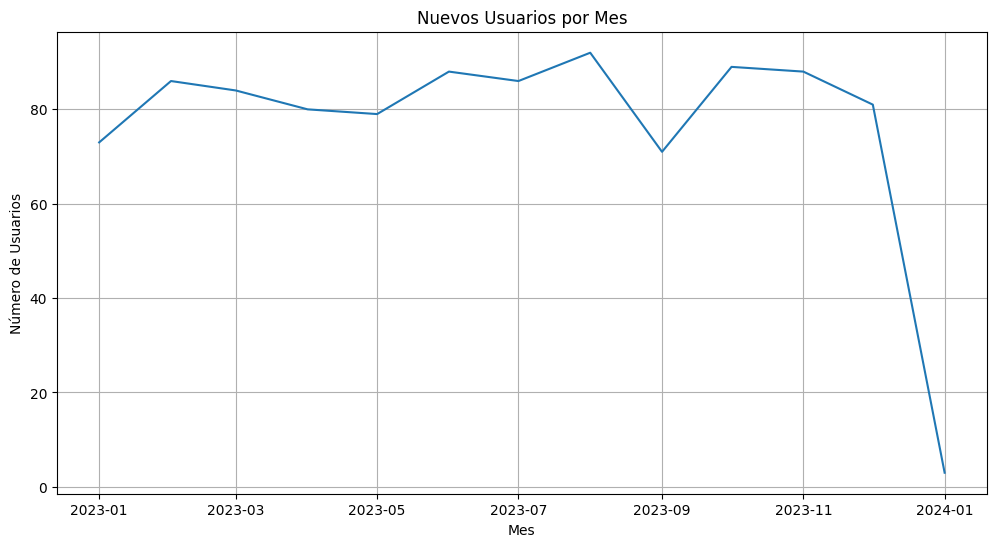

In [ ]:
# Consulta SQL
query = """
SELECT strftime('%Y-%m', FECHA_REG) AS MES, COUNT(*) AS TOTAL
FROM USUARIO
GROUP BY MES
ORDER BY MES;
"""

# Ejecutar consulta
usuarios_por_mes = pd.read_sql_query(query, conn)

# Convertir a datetime para mejor manejo
usuarios_por_mes['MES'] = pd.to_datetime(usuarios_por_mes['MES'])

# Visualización
plt.figure(figsize=(12, 6))
sns.lineplot(x='MES', y='TOTAL', data=usuarios_por_mes)
plt.title('Nuevos Usuarios por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Usuarios')
plt.grid(True)
plt.show()

## 2. Distribución de Productos por Categoría

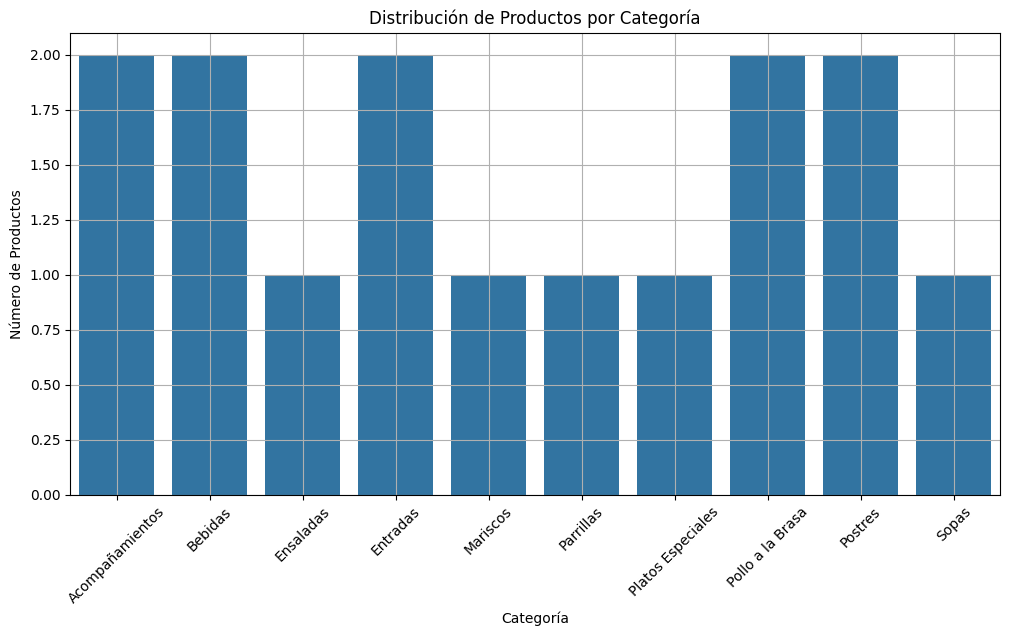

In [ ]:
# Consulta SQL
query = """
SELECT CATEGORIA.NOMBRE AS CATEGORIA, COUNT(*) AS TOTAL
FROM PRODUCTO
JOIN CATEGORIA ON PRODUCTO.CATEGORIA_ID = CATEGORIA.ID_CATEGORIA
GROUP BY CATEGORIA.NOMBRE;
"""

# Ejecutar consulta
productos_por_categoria = pd.read_sql_query(query, conn)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='CATEGORIA', y='TOTAL', data=productos_por_categoria)
plt.title('Distribución de Productos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Productos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 3. Proformas por Estado

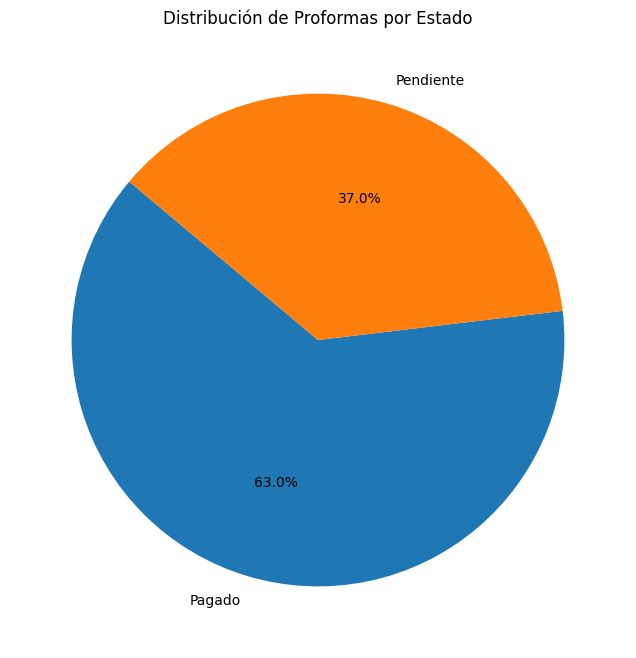

In [ ]:
# Consulta SQL
query = """
SELECT STATUS, COUNT(*) AS TOTAL
FROM PROFORMA
GROUP BY STATUS;
"""

# Ejecutar consulta
proformas_por_estado = pd.read_sql_query(query, conn)

# Visualización
plt.figure(figsize=(8, 8))
plt.pie(proformas_por_estado['TOTAL'], labels=proformas_por_estado['STATUS'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Proformas por Estado')
plt.show()

## 4. Productos más Vendidos

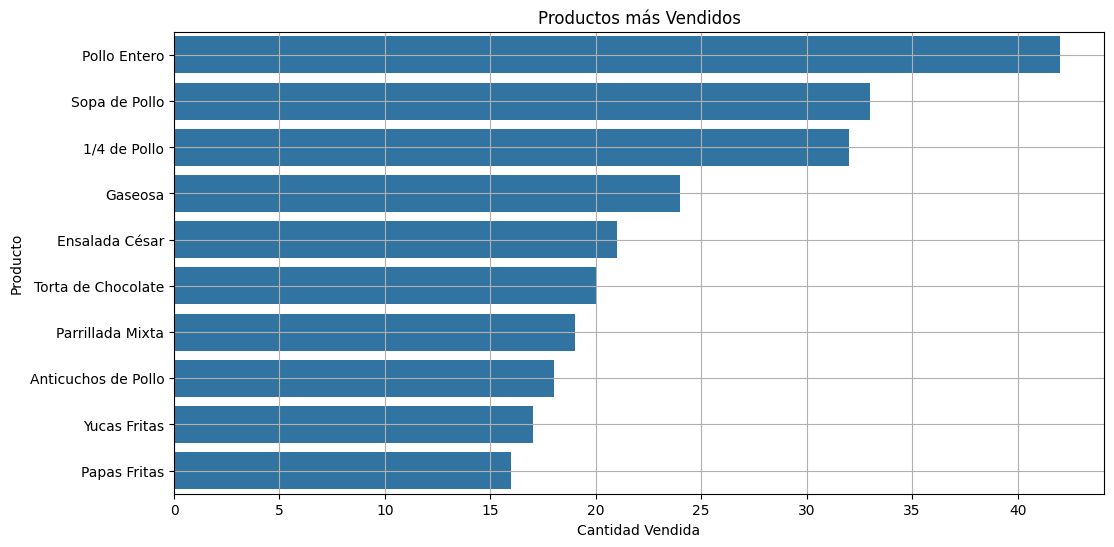

In [ ]:
# Consulta SQL
query = """
SELECT PRODUCTO.NOMBRE, SUM(DETALLE_PEDIDO.CANTIDAD) AS TOTAL_VENDIDO
FROM DETALLE_PEDIDO
JOIN PRODUCTO ON DETALLE_PEDIDO.PRODUCTO_ID = PRODUCTO.ID_PRODUCTO
GROUP BY PRODUCTO.NOMBRE
ORDER BY TOTAL_VENDIDO DESC
LIMIT 10;
"""

# Ejecutar consulta
productos_mas_vendidos = pd.read_sql_query(query, conn)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='TOTAL_VENDIDO', y='NOMBRE', data=productos_mas_vendidos)
plt.title('Productos más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.grid(True)
plt.show()

## 5. Ventas por Mes

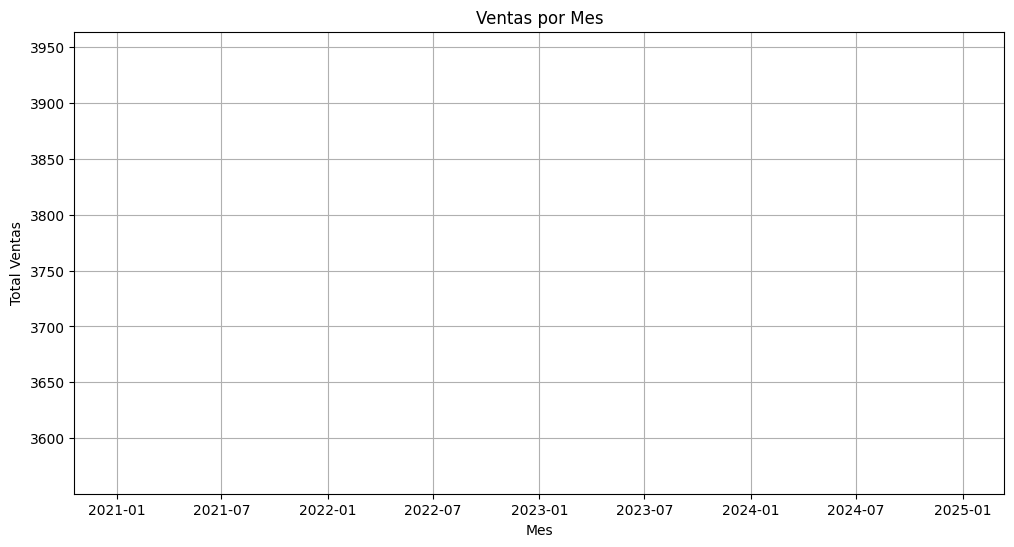

In [ ]:
# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')

# Función para ejecutar una consulta y obtener un DataFrame de Pandas
def ejecutar_consulta(query):
    return pd.read_sql_query(query, conn)

# Consulta SQL corregida
query = """
SELECT strftime('%Y-%m', PAGO.FECHA_PAGO) AS MES, SUM(DETALLE_PEDIDO.PRECIO * DETALLE_PEDIDO.CANTIDAD) AS TOTAL_VENTAS
FROM DETALLE_PEDIDO
JOIN PEDIDO ON DETALLE_PEDIDO.PEDIDO_ID = PEDIDO.ID_PEDIDO
JOIN PAGO ON PEDIDO.PAGO_ID = PAGO.ID_PAGO
GROUP BY MES
ORDER BY MES;
"""

# Ejecutar consulta
ventas_por_mes = ejecutar_consulta(query)

# Convertir a datetime para mejor manejo
ventas_por_mes['MES'] = pd.to_datetime(ventas_por_mes['MES'])

# Visualización
plt.figure(figsize=(12, 6))
sns.lineplot(x='MES', y='TOTAL_VENTAS', data=ventas_por_mes)
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Total Ventas')
plt.grid(True)
plt.show()

# Cerrar la conexión
conn.close()

In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')

# Función para ejecutar una consulta y obtener un DataFrame de Pandas
def ejecutar_consulta(query):
    return pd.read_sql_query(query, conn)

# Verificar datos en la tabla DETALLE_PEDIDO
query = "SELECT * FROM DETALLE_PEDIDO LIMIT 5;"
detalles_pedido = ejecutar_consulta(query)
print("Detalles Pedido:")
print(detalles_pedido)

# Verificar datos en la tabla PEDIDO
query = "SELECT * FROM PEDIDO LIMIT 5;"
pedidos = ejecutar_consulta(query)
print("Pedidos:")
print(pedidos)

# Verificar datos en la tabla PAGO
query = "SELECT * FROM PAGO LIMIT 5;"
pagos = ejecutar_consulta(query)
print("Pagos:")
print(pagos)

# Cerrar la conexión
conn.close()

Detalles Pedido:
   ID_DETALLE_PEDIDO  PEDIDO_ID  PRODUCTO_ID  CANTIDAD  PRECIO
0                  1          1            9         3       3
1                  2          2           12         8       9
2                  3          3            9         2       3
3                  4          4           14         9      36
4                  5          5           12         5       9
Pedidos:
   ID_PEDIDO  USUARIO_ID  PAGO_ID      STATUS
0          1          81        1     Enviado
1          2          57        2  En Proceso
2          3           8        3     Enviado
3          4          24        4   Entregado
4          5          33        5     Enviado
Pagos:
   ID_PAGO  USUARIO_ID                NOMBRE_TARJETA       NUMERO_TARJETA  \
0        1          81       JOE PALACIOS MONTENEGRO  5190-5179-8376-0473   
1        2          57        MIA HUAMANTINCO NIEVES  3284-2300-8579-5341   
2        3           8        GIOVANNA AREVALO LOPEZ  4785-5754-1905-0683   
3    

Ventas por Mes:
       MES  TOTAL_VENTAS
0  2023-01          3757


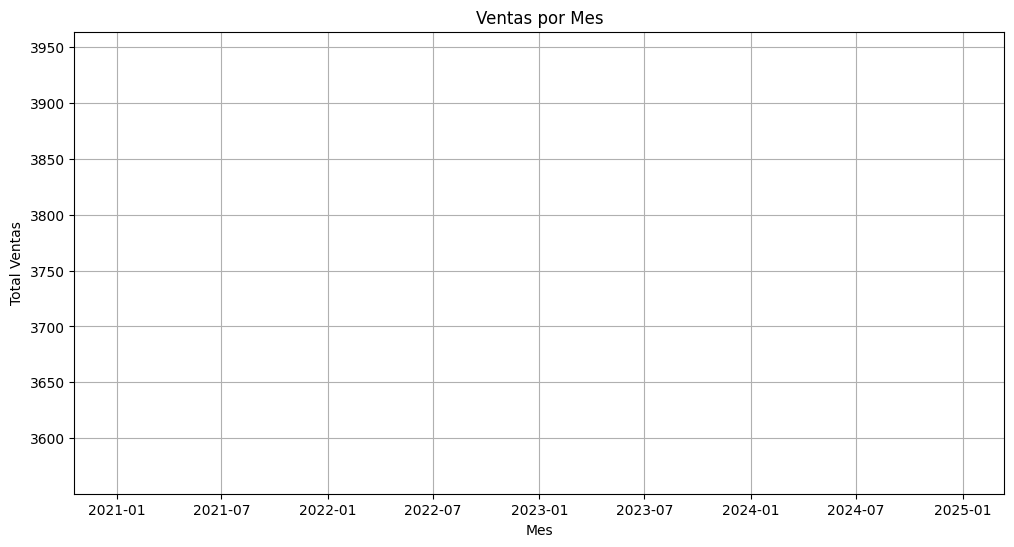

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')

# Consulta SQL corregida
query = """
SELECT strftime('%Y-%m', PAGO.FECHA_PAGO) AS MES, SUM(DETALLE_PEDIDO.PRECIO * DETALLE_PEDIDO.CANTIDAD) AS TOTAL_VENTAS
FROM DETALLE_PEDIDO
JOIN PEDIDO ON DETALLE_PEDIDO.PEDIDO_ID = PEDIDO.ID_PEDIDO
JOIN PAGO ON PEDIDO.PAGO_ID = PAGO.ID_PAGO
WHERE PAGO.FECHA_PAGO >= '2023-01-01'
GROUP BY MES
ORDER BY MES;
"""

# Ejecutar consulta
ventas_por_mes = pd.read_sql_query(query, conn)

# Verificar si hay datos
print("Ventas por Mes:")
print(ventas_por_mes)

# Asegurarse de que hay datos antes de convertir y graficar
if not ventas_por_mes.empty:
    # Convertir a datetime para mejor manejo
    ventas_por_mes['MES'] = pd.to_datetime(ventas_por_mes['MES'])

    # Visualización
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='MES', y='TOTAL_VENTAS', data=ventas_por_mes)
    plt.title('Ventas por Mes')
    plt.xlabel('Mes')
    plt.ylabel('Total Ventas')
    plt.grid(True)
    plt.show()
else:
    print("No hay datos para mostrar en el gráfico.")

# Cerrar la conexión
conn.close()

Ventas por Categoría:
          CATEGORIA  TOTAL_VENTAS
0  Pollo a la Brasa          1380
1         Parrillas           684
2          Mariscos           615
3           Postres           320
4             Sopas           231
5         Ensaladas           189
6   Acompañamientos           149
7           Bebidas            96
8          Entradas            93


<ipython-input-25-ef1e53279454>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOTAL_VENTAS', y='CATEGORIA', data=ventas_por_categoria, palette='viridis')


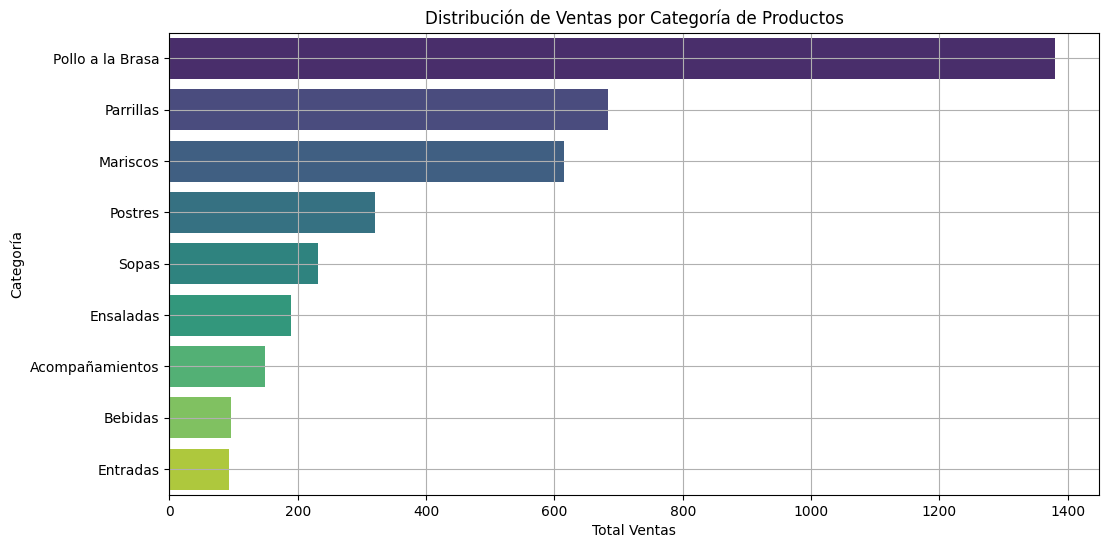

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('mi_base_de_datos.db')

# Consulta SQL para obtener la cantidad total de ventas por categoría
query = """
SELECT CATEGORIA.NOMBRE AS CATEGORIA, SUM(DETALLE_PEDIDO.PRECIO * DETALLE_PEDIDO.CANTIDAD) AS TOTAL_VENTAS
FROM DETALLE_PEDIDO
JOIN PRODUCTO ON DETALLE_PEDIDO.PRODUCTO_ID = PRODUCTO.ID_PRODUCTO
JOIN CATEGORIA ON PRODUCTO.CATEGORIA_ID = CATEGORIA.ID_CATEGORIA
GROUP BY CATEGORIA
ORDER BY TOTAL_VENTAS DESC;
"""

# Ejecutar consulta
ventas_por_categoria = pd.read_sql_query(query, conn)

# Verificar si hay datos
print("Ventas por Categoría:")
print(ventas_por_categoria)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='TOTAL_VENTAS', y='CATEGORIA', data=ventas_por_categoria, palette='viridis')
plt.title('Distribución de Ventas por Categoría de Productos')
plt.xlabel('Total Ventas')
plt.ylabel('Categoría')
plt.grid(True)
plt.show()

# Cerrar la conexión
conn.close()